In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip -q install pandas
!pip -q install nltk
!pip -q install tensorflow
!pip -q install keras

In [ ]:
import pandas as pd

# Đọc file CSV
data = pd.read_csv('/content/drive/MyDrive/emotions.csv')

# Kiểm tra dữ liệu
print(data.head())


                                                text  label
0      i just feel really helpless and heavy hearted      4
1  ive enjoyed being able to slouch about relax a...      0
2  i gave up my internship with the dmrg and am f...      4
3                         i dont know i feel so lost      0
4  i am a kindergarten teacher and i am thoroughl...      4


In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Chuyển thành chữ thường
    text = text.lower()
    # Loại bỏ dấu câu và ký tự đặc biệt
    text = re.sub(f"[{string.punctuation}]", "", text)
    # Loại bỏ số
    text = re.sub(r'\d+', '', text)
    # Loại bỏ từ dừng
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Áp dụng tiền xử lý cho cột text
data['text'] = data['text'].apply(preprocess_text)
print(data.head)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<bound method NDFrame.head of                                                      text  label
0                      feel really helpless heavy hearted      4
1       ive enjoyed able slouch relax unwind frankly n...      0
2                 gave internship dmrg feeling distraught      4
3                                     dont know feel lost      0
4       kindergarten teacher thoroughly weary job take...      4
...                                                   ...    ...
416804  feel like telling horny devils find site suite...      2
416805  began realize feeling agitated restless would ...      3
416806  feel curious previous early dawn time seek tro...      5
416807  feel becuase tyranical nature government el sa...      3
416808  think spent time investigating surroundings th...      5

[416809 rows x 2 columns]>


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Cấu hình tokenizer
max_words = 10000 # Số lượng từ tối đa để giữ lại
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['text'])

# Chuyển văn bản thành các sequences
sequences = tokenizer.texts_to_sequences(data['text'])

# Padding để các sequences có độ dài bằng nhau
max_len = 100 # Độ dài tối đa cho các sequences
X = pad_sequences(sequences, maxlen=max_len)

# Chuyển nhãn thành dạng số nếu cần thiết
y = data['label'].values


In [ ]:
y.shape

(416809,)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kiểm tra kích thước của các tập dữ liệu
print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')


X_train shape: (333447, 100), y_train shape: (333447,)
X_test shape: (83362, 100), y_test shape: (83362,)


In [ ]:
# Tham số mô hình
embedding_dim = 100  # Kích thước embedding
max_len = 100        # Độ dài tối đa của sequences (đã thiết lập trước đó)
max_words = 50000    # Số lượng từ tối đa để giữ lại (đã thiết lập trước đó)

# Xây dựng mô hình
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model.add(LSTM(128, return_sequences=True))  # LSTM với 128 units
model.add(Dropout(0.2))
model.add(LSTM(64))  # LSTM với 64 units
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))  # Sử dụng softmax cho phân loại nhiều lớp

# Biên dịch mô hình
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])



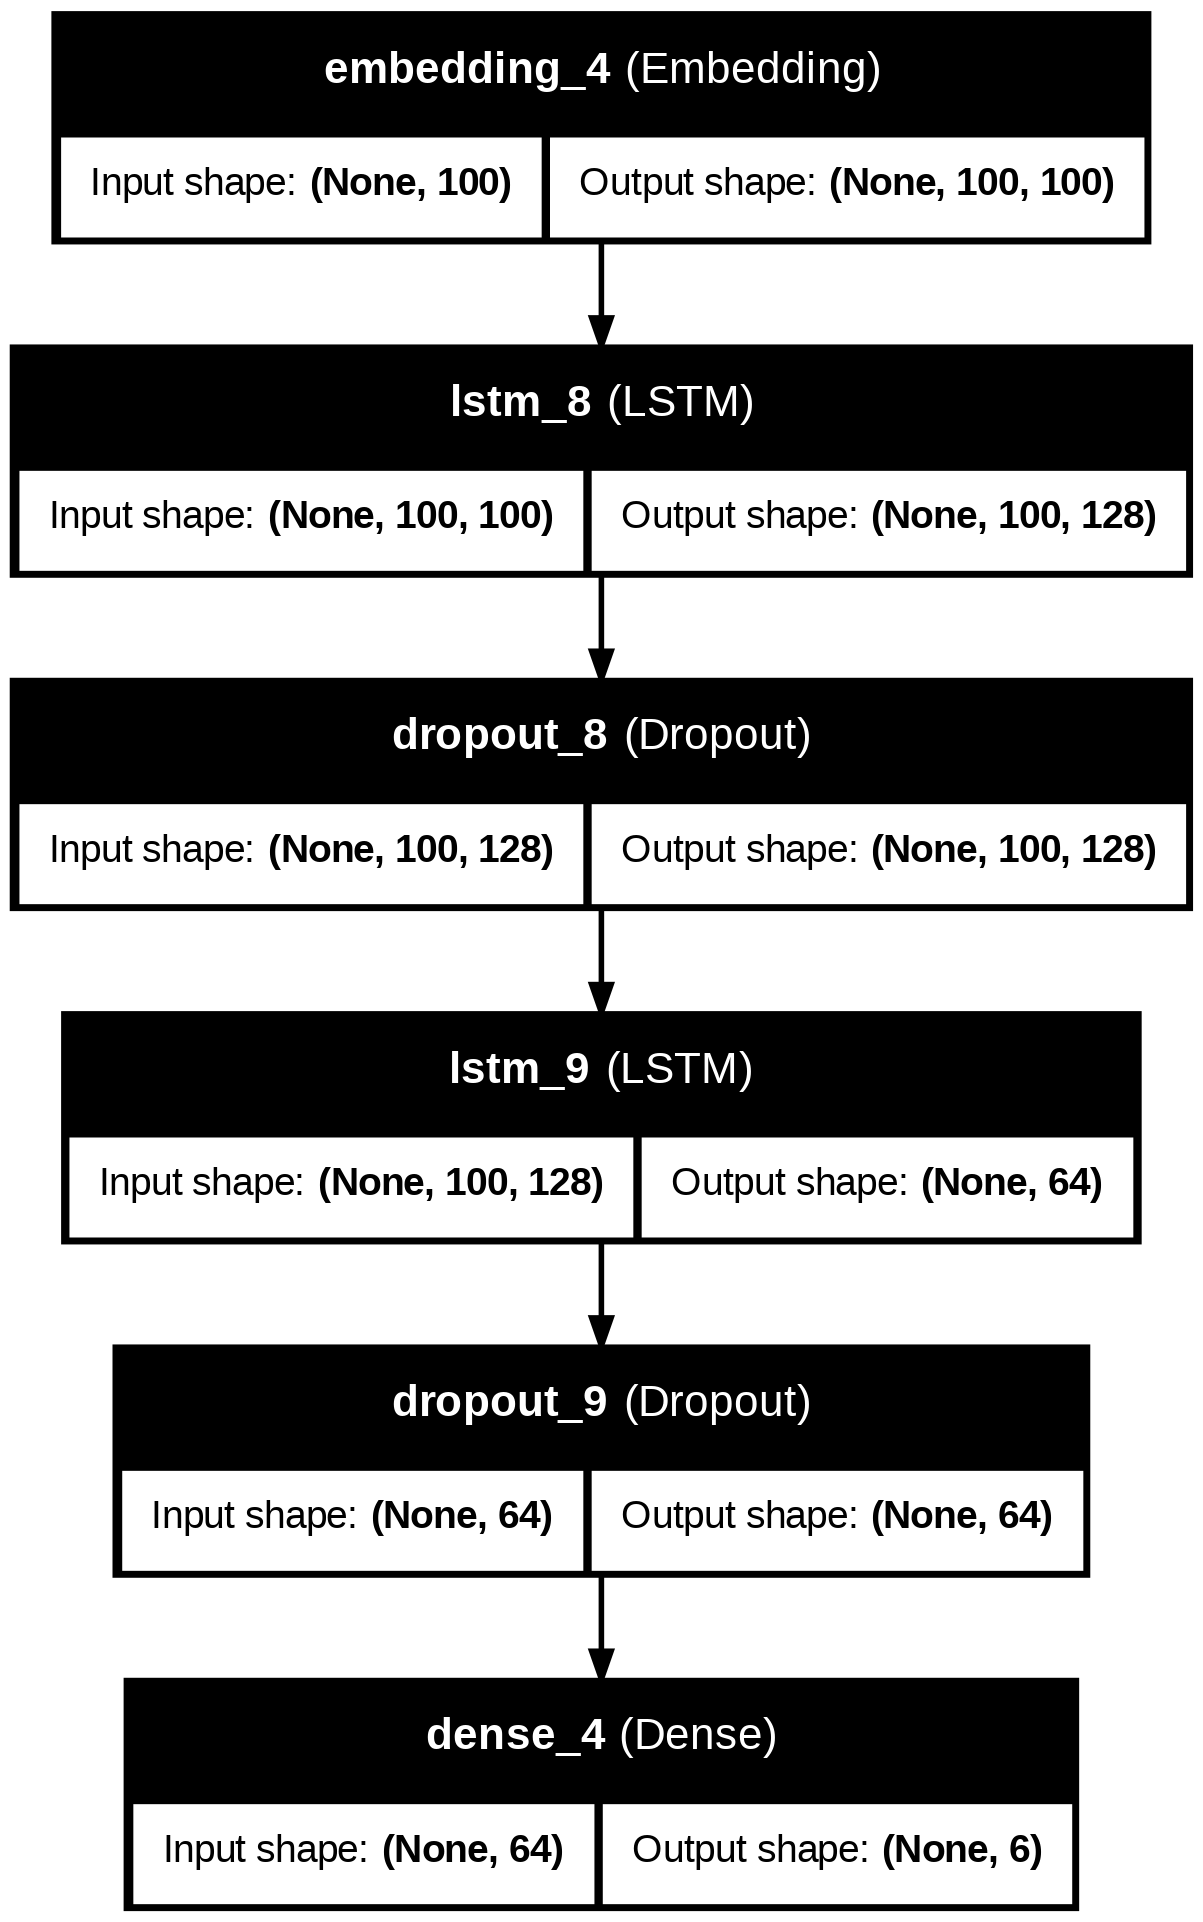

In [ ]:
# Xây dựng mô hình
model.build(input_shape=(None, max_len))

# Vẽ mô hình
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=3, batch_size=64, validation_data=(X_test, y_test))
# Save the entire model to a file
model.save('my_model.h5')  # Saves as a single HDF5 file

# Or save as a TensorFlow SavedModel (recommended for TensorFlow 2.x)
model.save('my_model')


Epoch 1/3
5211/5211 ━━━━━━━━━━━━━━━━━━━━ 2379s 456ms/step - accuracy: 0.8432 - loss: 0.3742 - val_accuracy: 0.9407 - val_loss: 0.0941
Epoch 2/3
5211/5211 ━━━━━━━━━━━━━━━━━━━━ 2328s 438ms/step - accuracy: 0.9406 - loss: 0.0940 - val_accuracy: 0.9398 - val_loss: 0.0915
Epoch 3/3
5211/5211 ━━━━━━━━━━━━━━━━━━━━ 2395s 456ms/step - accuracy: 0.9424 - loss: 0.0866 - val_accuracy: 0.9392 - val_loss: 0.0912


ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=my_model.

In [ ]:
model.save('my_model.h5')


2606/2606 ━━━━━━━━━━━━━━━━━━━━ 209s 80ms/step


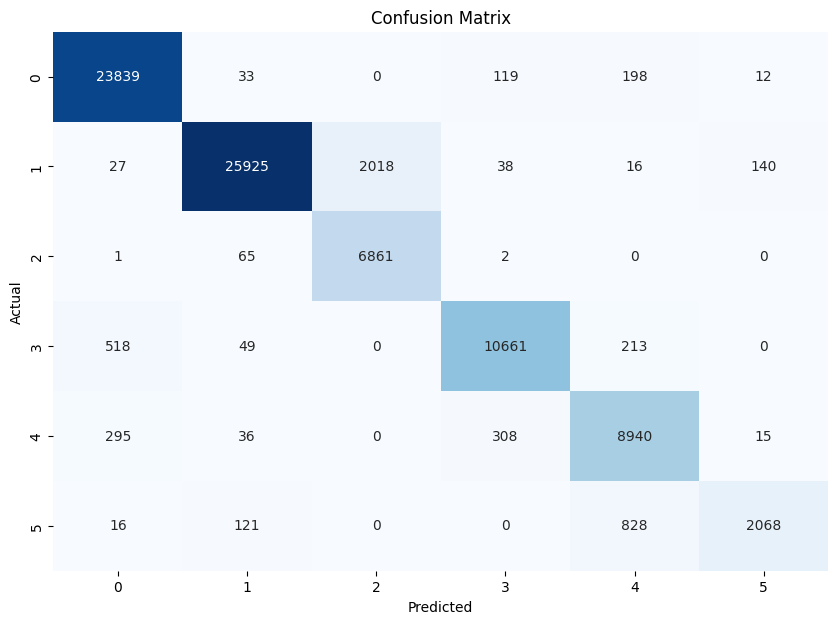

F1 Score: 0.9394952168611908
Precision: 0.9444730543823068
Recall: 0.9392049135097527


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score
import seaborn as sns

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class indices

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate F1 score, precision, and recall
f1 = f1_score(y_test, y_pred_classes, average='weighted')
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')

print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')


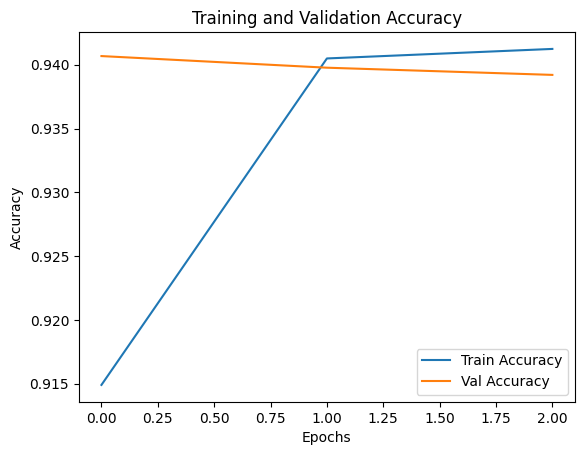

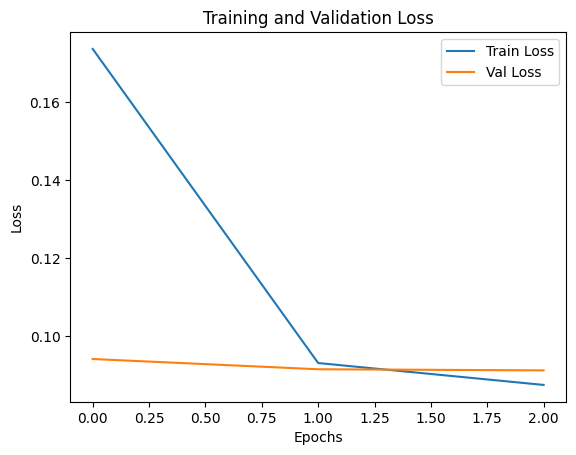

In [ ]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ độ chính xác
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Vẽ biểu đồ tổn thất (loss)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Đánh giá mô hình trên tập kiểm tra
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')




2606/2606 ━━━━━━━━━━━━━━━━━━━━ 263s 101ms/step - accuracy: 0.9389 - loss: 0.0915
Test Accuracy: 93.92%
